<a href="https://colab.research.google.com/github/johnnykava/trabalhoA2-DataScience/blob/main/CodigoGraficoAvaliativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import files


uploaded = files.upload()


Saving amazon_cells_labelled.txt to amazon_cells_labelled (1).txt


In [51]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['amazon_cells_labelled (1).txt']),sep = '\t')
print(df)

                                                  text  target
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
..                                                 ...     ...
995  The screen does get smudged easily because it ...       0
996  What a piece of junk.. I lose more calls on th...       0
997                       Item Does Not Match Picture.       0
998  The only thing that disappoint me is the infra...       0
999  You can not answer calls with the unit, never ...       0

[1000 rows x 2 columns]


In [52]:
#Mostra a quantidade de linhas e colunas
df.shape

(1000, 2)

In [ ]:
#Usar somente se o target não estiver transformado em 0 ou 1
df['target'] = df['target'].apply(lambda x: 0 if x == 'ham' else 1)

In [53]:
df.groupby('target')['target'].count()

,target
target,
0,500
1,500


In [54]:
#Faz a contagem dos dados
contagem_classes = df.groupby('target')['target'].count()
total = contagem_classes.sum()

#Depois multiplica por 100 para dar em %
porcentagem_classes = contagem_classes / total * 100
print(porcentagem_classes)


target
0    50.0
1    50.0
Name: target, dtype: float64


In [55]:
#Separamos os dados para treino e test
import numpy as np
from sklearn.model_selection import train_test_split
X = df['text']
y= df['target']
#Embaralhamos os dados sendo 25% para teste e 75% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
#!pip install scikit-learn==1.2.2
from sklearn.feature_extraction.text import TfidfVectorizer

#Baixa uma lista de palavras que não tem peso para frases
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


#Pega as palavras sem peso da lingua "Ingles"
stop_words = stopwords.words('english')

#Armazena o indice das frases que foram para teste e treino mesmo apos embaralhar
X_train_indices = X_train.index
X_test_indices = X_test.index

#Usamos os indices que foram armazenos para pegar exatamente as frases separadas de treino e teste
X_train_text = df['text'].iloc[X_train_indices]
X_test_text = df['text'].iloc[X_test_indices]


vectorizer = TfidfVectorizer(stop_words=stop_words)
# Faz a contagem de palavras das frases
X_train_tfidf = vectorizer.fit_transform(X_train_text)
# Faz um teste com as contagem de palavras obtidas no treino e não considera palavras novas
X_test_tfidf = vectorizer.transform(X_test_text)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model = RandomForestClassifier()
#Faz o modelo aprender usando os dados convertidos
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [59]:
#Faz uma previsão com os dados obtidos no teste informando (0 ou 1)
y_pred = model.predict(X_test_tfidf)

In [60]:
#Nos mostra a confiança do modelo, a % que ele acha que um item é positivo
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.764
Precision: 0.782258064516129
Recall: 0.751937984496124


In [62]:
# Assuming 'positive' is the first class (index 0)
positive_class_index = 1

# Extract probabilities for the positive class
probs = model.predict_proba(X_test_tfidf)
positive_probs = probs[:,1]

# Print the first 5 probabilities
print(positive_probs)

[0.742      0.67       0.73       0.1        0.58       0.9
 0.41       0.885      0.08       0.93       1.         0.04
 0.072      0.54       0.512      0.382      0.82       0.04
 0.18       0.91       0.6505     0.83       0.86       0.162
 0.29       0.12       0.03       0.405      0.425      0.95
 0.177      0.162      0.04       0.895      0.172      0.17
 0.72       0.645      0.58       0.005      0.162      0.59
 0.22       0.67       0.48       0.84       0.91       0.07
 0.25       0.377      0.542      0.235      0.325      0.26
 0.205      0.68       0.275      0.96       0.48       0.072
 0.98       0.74       0.33       0.05       0.04       0.835
 0.89       0.85       0.1        0.07       0.93       0.31
 0.042      0.74       0.84       0.95       0.105      0.25
 0.33       0.312      0.64       0.047      0.95       0.59
 0.17       0.195      0.075      0.387      0.79       0.53
 0.197      0.95       0.072      0.37       0.665      0.06
 0.03       0.92      

In [63]:
#Organiza todas as probabilidades de ser positivo junto do target
df_pos = pd.DataFrame({"prob_spam": positive_probs,"target":y_test})

In [64]:
df_pos

,prob_spam,target
521,0.742,1
737,0.670,1
740,0.730,1
660,0.100,0
411,0.580,1
...,...,...
109,0.130,0
430,0.232,1
77,0.940,1
84,0.790,0


In [65]:
#Mostra as linhas e colunas
df_pos.shape

(250, 2)

In [66]:
#Separa apenas para os que são positivos
df_apenas_positivo = df_pos.loc[df_pos['target']==1]

In [67]:
#Mostra as linhas e colunas
df_apenas_positivo.shape

(129, 2)

In [68]:
df_apenas_positivo

,prob_spam,target
521,0.742,1
737,0.670,1
740,0.730,1
411,0.580,1
678,0.900,1
...,...,...
333,0.410,1
514,0.940,1
306,0.990,1
430,0.232,1


In [69]:
df_pos

,prob_spam,target
521,0.742,1
737,0.670,1
740,0.730,1
660,0.100,0
411,0.580,1
...,...,...
109,0.130,0
430,0.232,1
77,0.940,1
84,0.790,0


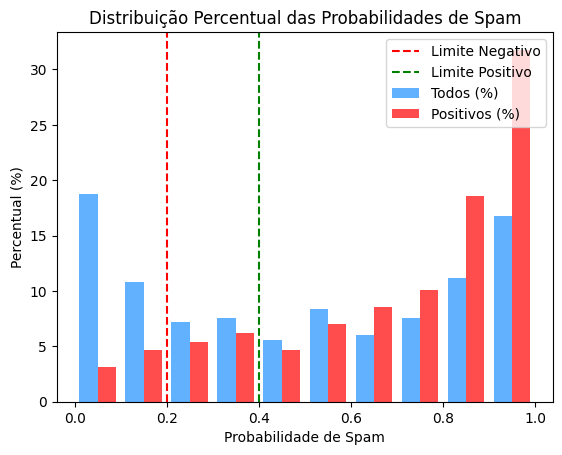

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Cria as caixas (bins) de 10% em 10% porcento
step = 0.1
bins = np.arange(0, 1 + step, step)

#Faz a contagem de todas as probabilidades
hist_all, _ = np.histogram(df_pos["prob_spam"], bins=bins)
#Faz a contagem somente das probabilidades que realmente eram positivas
hist_pos, _ = np.histogram(df_apenas_positivo["prob_spam"], bins=bins)

# Convertendo para percentual (%)
hist_all_pct = (hist_all / hist_all.sum()) * 100
hist_pos_pct = (hist_pos / hist_pos.sum()) * 100

# Posicionamento das barras
width = step * 0.4
x = bins[:-1] + step/2

plt.bar(x - width/2, hist_all_pct, width=width, label='Todos (%)', color='#1E90FF', alpha=0.7)
plt.bar(x + width/2, hist_pos_pct, width=width, label='Positivos (%)', color='red', alpha=0.7)

plt.xlabel('Probabilidade de Spam')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual das Probabilidades de Spam')

# Pontos de corte customizáveis
threshold_neg = 0.2
threshold_pos = 0.4
plt.axvline(threshold_neg, color='red', linestyle='--', label='Limite Negativo')
plt.axvline(threshold_pos, color='green', linestyle='--', label='Limite Positivo')

plt.legend()
plt.show()

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corte 0.2 -> considera como positivo apenas prob > 0.2 (zona negativa como 0)
y_pred_02 = (df_pos["prob_spam"] > 0.2).astype(int)

# Corte 0.4 -> considera como positivo prob >= 0.4 (zona positiva como 1)
y_pred_04 = (df_pos["prob_spam"] >= 0.4).astype(int)

# métricas para corte 0.2
print("Corte 0.2")
print("Accuracy:", accuracy_score(df_pos["target"], y_pred_02))
print("Precision:", precision_score(df_pos["target"], y_pred_02))
print("Recall:", recall_score(df_pos["target"], y_pred_02))
print("F1:", f1_score(df_pos["target"], y_pred_02))

# métricas para corte 0.4
print("\nCorte 0.4")
print("Accuracy:", accuracy_score(df_pos["target"], y_pred_04))
print("Precision:", precision_score(df_pos["target"], y_pred_04))
print("Recall:", recall_score(df_pos["target"], y_pred_04))
print("F1:", f1_score(df_pos["target"], y_pred_04))


Corte 0.2
Accuracy: 0.728
Precision: 0.6742857142857143
Recall: 0.9147286821705426
F1: 0.7763157894736842

Corte 0.4
Accuracy: 0.76
Precision: 0.7482014388489209
Recall: 0.8062015503875969
F1: 0.7761194029850746


In [72]:
def assign_zone(prob):
    if prob <= 0.2:
        return "negativa"
    elif prob >= 0.4:
        return "positiva"
    else:
        return "manual"

#Usa a função para cada uma das probabilidades
df_pos["zone"] = df_pos["prob_spam"].apply(assign_zone)

# Ver quantos exemplos vão para cada zona
print(df_pos["zone"].value_counts())


zone
positiva    139
negativa     75
manual       36
Name: count, dtype: int64


array([[<Axes: title={'center': 'prob_spam'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

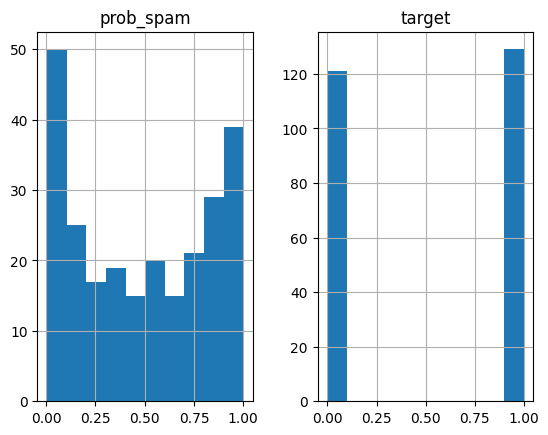

In [73]:
df_pos.hist()

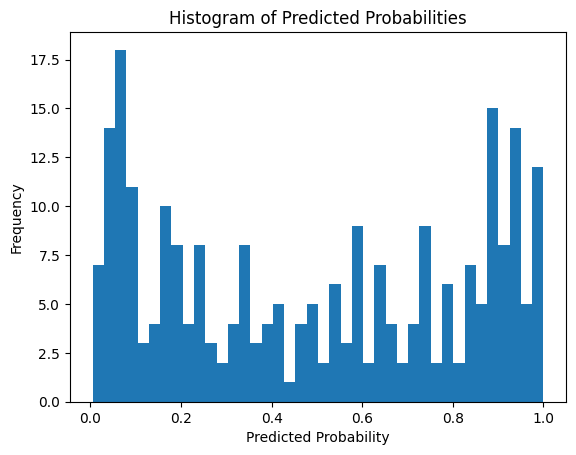

In [74]:
plt.hist(positive_probs, bins=40)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities")
plt.show()

In [75]:
nomes_features = vectorizer.get_feature_names_out()

          Palavra  Importancia
593         great     0.074186
587          good     0.026326
1439        works     0.022782
943         phone     0.021492
1408         well     0.020439
858          nice     0.016568
459     excellent     0.016483
768          love     0.014455
131          best     0.013553
254   comfortable     0.012044


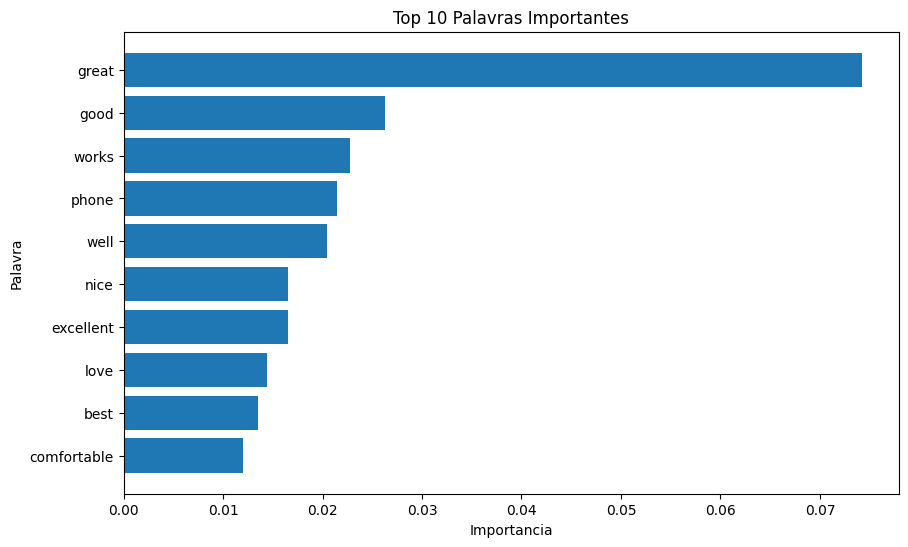

In [76]:
#Pega a importancia de cada palavra consideradas importantes que o modelo selecionou
importances = model.feature_importances_

#Pega a lista de palavras na mesma ordem das importancias
feature_names = vectorizer.get_feature_names_out()
#Cria um dataframe com as palavras consideradas importantes e suas notas
feature_importance_df = pd.DataFrame({'Palavra': feature_names, 'Importancia': importances})

#Ordena a tabela pela coluna Importancia
feature_importance_df = feature_importance_df.sort_values('Importancia', ascending=False)

#Quantidade de palavras que queremos
N = 10
print(feature_importance_df.head(N))

#Desenha o mapa
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Palavra'][:N], feature_importance_df['Importancia'][:N])
plt.xlabel('Importancia')
plt.ylabel('Palavra')
plt.title('Top {} Palavras Importantes'.format(N))
plt.gca().invert_yaxis()
plt.show()